In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('mandar_gurgaon_properties_outlier_treated.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,umang monsoon breeze,sector 78,0.75,6053.0,1239.0,Built Up area: 1239 (115.11 sq.m.)Carpet area:...,2,2,1,5.0,East,Undefined,NaN,1239.0,1100.0,0,0,0,0,0,0,0,619.500000
1,flat,ireo skyon,sector 60,2.15,23344.0,921.0,Super Built up area 1524(141.58 sq.m.)Built Up...,2,3,2,5.0,East,Relatively New,1524.0,1250.0,921.0,0,1,0,0,0,1,49,460.500000
2,flat,dlf regal gardens,sector 90,1.23,7053.0,1744.0,Super Built up area 1744(162.02 sq.m.),3,3,2,19.0,North,Relatively New,1744.0,NaN,NaN,0,0,0,0,1,0,6,581.333333
3,house,independent,sector 2,5.00,15385.0,3250.0,Carpet area: 3250 (301.93 sq.m.),6,6,2,1.0,South,Undefined,NaN,NaN,3250.0,0,0,0,0,0,0,0,541.666667
4,flat,dlf the arbour,sector 63,7.52,18999.0,3958.0,Built Up area: 3956 (367.52 sq.m.)Carpet area:...,4,4,3,15.0,West,Undefined,NaN,3956.0,2200.0,0,0,0,0,0,0,61,989.500000


In [5]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1968
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

### Built up area - we have to fill the missing values in built_up_area using carpet_area and super_built_up_area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

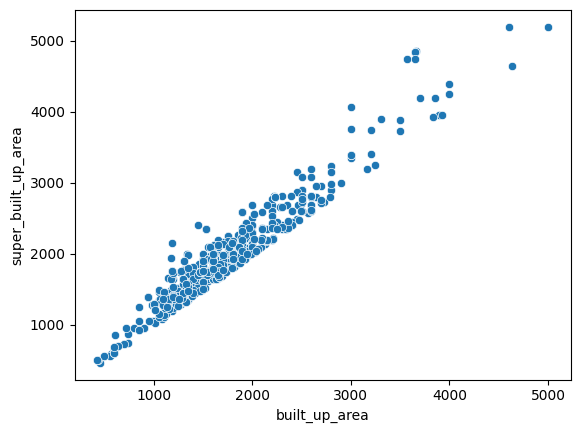

In [9]:
# sns.scatterplot(df['built_up_area'],df['super_built_up_area'])
sns.scatterplot(data=df, x='built_up_area', y='super_built_up_area')

# this shows a strong linear relationship between super_built_up_area and built_up_area

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

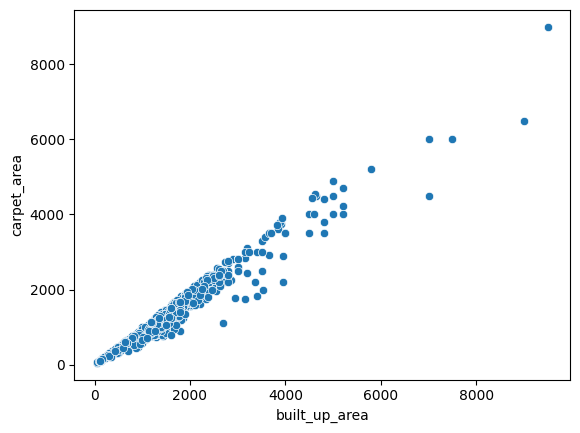

In [11]:
# sns.scatterplot(df['built_up_area'],df['carpet_area'])
sns.scatterplot(data=df, x='built_up_area', y='carpet_area')

# this is also a very strong relationship

In [12]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3550    False
3551    False
3552    False
3553    False
3554    False
Length: 3555, dtype: bool

In [13]:
# getting those rows where all types of area is available
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [14]:
all_present_df.shape

(531, 24)

In [23]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [24]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [25]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [26]:
# both present but built up area is null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [27]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
11,flat,umang winter hills,sector 77,0.99,7857.0,1260.0,Super Built up area 1260(117.06 sq.m.)Carpet a...,2,2,2,1.0,North,Relatively New,1260.0,NaN,1000.0,0,0,0,0,0,0,97,630.000000
20,flat,alpha corp gurgaonone,sector 84,1.15,7497.0,1534.0,Super Built up area 1534(142.51 sq.m.)Carpet a...,2,2,3,14.0,South-East,Relatively New,1534.0,NaN,1260.0,1,0,0,0,0,0,28,767.000000
30,flat,pivotal devaan,sector 84,0.27,7965.0,339.0,Super Built up area 439(40.78 sq.m.)Carpet are...,1,1,1,13.0,North-East,Relatively New,439.0,NaN,339.0,0,0,0,0,0,2,45,339.000000
44,flat,m3m sierra 68,sector 68,1.25,10246.0,1220.0,Super Built up area 1220(113.34 sq.m.)Carpet a...,2,2,3,4.0,NaN,New Property,1220.0,NaN,694.0,0,0,0,0,0,0,44,610.000000
51,flat,unitech uniworld gardens,sector 47,2.40,11505.0,2086.0,Super Built up area 2086(193.8 sq.m.)Carpet ar...,3,4,3+,10.0,East,Moderately Old,2086.0,NaN,1750.0,0,1,0,0,0,0,103,695.333333


In [28]:
# super_built_up_area / built_up_area = 1.105  ->  implies built_up_area = super_built_up_area / 1.105
# carpet_area / built_up_area = 0.9            ->  implies built_up_area = carpet_area / 0.9

# therefore here we are taking the average of both to fill the built_up_area
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_29924\2534200494.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_29924\2534200494.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [29]:
df.update(sbc_df)

In [30]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1547
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [31]:
# super_built_up_area present carpet_area is null built_up_area is null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [32]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
2,flat,dlf regal gardens,sector 90,1.23,7053.0,1744.0,Super Built up area 1744(162.02 sq.m.),3,3,2,19.0,North,Relatively New,1744.0,NaN,NaN,0,0,0,0,1,0,6,581.333333
12,flat,godrej nature plus,sector 33,1.07,7726.0,1385.0,Super Built up area 1385(128.67 sq.m.),2,2,2,14.0,North-East,Under Construction,1385.0,NaN,NaN,0,0,0,0,0,0,68,692.500000
15,flat,avl 36 gurgaon,sector 36a,0.45,9000.0,500.0,Super Built up area 500(46.45 sq.m.),1,1,1,9.0,NaN,Relatively New,500.0,NaN,NaN,0,0,0,0,0,0,0,500.000000
16,flat,millenium bajrang society,sector 43,2.50,9434.0,2650.0,Super Built up area 2650(246.19 sq.m.),4,4,3+,2.0,South,Relatively New,2650.0,NaN,NaN,0,0,0,0,0,1,94,662.500000
17,flat,bestech park view sanskruti,sector 92,1.55,7769.0,1995.0,Super Built up area 1995(185.34 sq.m.),3,4,3,8.0,North,Relatively New,1995.0,NaN,NaN,0,1,0,0,0,0,49,665.000000


In [33]:
# here as carpet area is not available, we will fill it using super_built_up_area
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_29924\44083146.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_29924\44083146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(s

In [34]:
df.update(sb_df)

In [35]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area           672
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [36]:
# super_built_up_area null carpet_area is present built_up_area null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [37]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
3,house,independent,sector 2,5.00,15385.0,3250.0,Carpet area: 3250 (301.93 sq.m.),6,6,2,1.0,South,Undefined,NaN,NaN,3250.0,0,0,0,0,0,0,0,541.666667
9,flat,godrej nature plus,sector 33,1.10,7971.0,1380.0,Carpet area: 1380 (128.21 sq.m.),2,2,2,14.0,North,Undefined,NaN,NaN,1380.0,0,0,0,0,0,0,56,690.000000
23,flat,emaar digihomes,sector 62,3.95,15263.0,2588.0,Carpet area: 2588 (240.43 sq.m.),3,3,3,33.0,East,New Property,NaN,NaN,2588.0,0,1,0,0,0,1,49,862.666667
31,flat,valley view estate,gwal pahari,1.50,8278.0,1812.0,Carpet area: 1812 (168.34 sq.m.),4,4,3+,9.0,North,Old Property,NaN,NaN,1812.0,1,1,0,0,1,0,135,453.000000
33,flat,smart world orchard,sector 61,2.00,12912.0,1549.0,Carpet area: 1549 (143.91 sq.m.),3,3,2,3.0,NaN,New Property,NaN,NaN,1549.0,0,0,0,0,1,0,61,516.333333


In [38]:
# here we will fill built_up_area using the ratio with carpet_area

c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_29924\3669012717.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_29924\3669012717.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carp

In [39]:
df.update(c_df)

In [40]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area             0
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

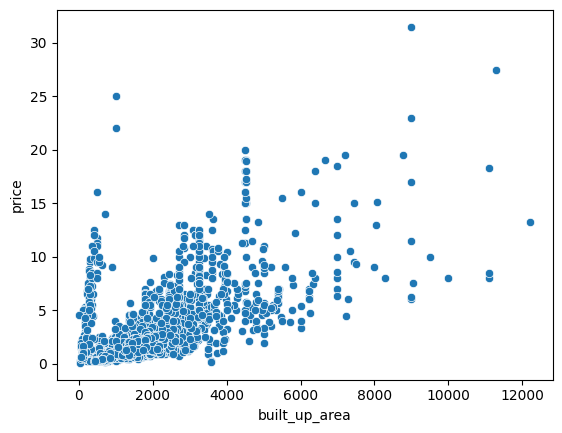

In [42]:
# sns.scatterplot(df['built_up_area'],df['price'])
sns.scatterplot(data=df, x='built_up_area', y='price')


In [44]:
# this scatter plot is mostly correct, but there seems to be some anomalies ie built_up_area is less but price is more

In [45]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [48]:
anamoly_df
# here we can see that the values in built_up_area are not justifying the prices, but the prices in area are justifying them
# so we will just copy the values from area to built_up_area

,price,area,built_up_area
5,12.50,3060.0,410.0
8,5.50,3240.0,355.0
13,4.25,1620.0,1620.0
25,3.60,1449.0,1449.0
41,3.55,1449.0,1449.0
...,...,...,...
3482,5.50,1935.0,1935.0
3483,7.00,2160.0,240.0
3491,5.50,1800.0,1800.0
3493,4.60,1460.0,1460.0


In [49]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [50]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

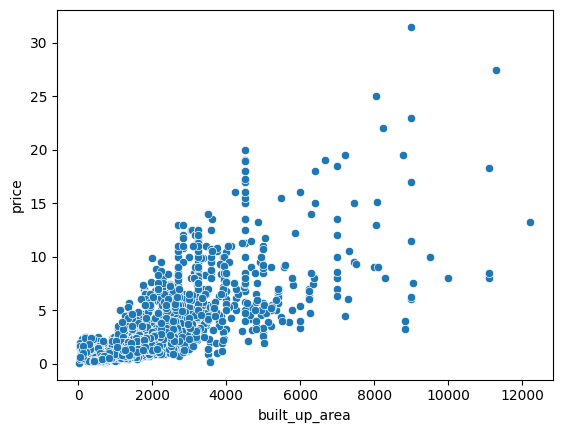

In [53]:
sns.scatterplot(data = df, x='built_up_area', y='price')
#now the anomalies seems to be removed

In [54]:
# now we dont require the below columns, so we remove them 
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [55]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,umang monsoon breeze,sector 78,0.75,6053.0,2,2,1,5.0,East,Undefined,1239.0,0,0,0,0,0,0,0
1,flat,ireo skyon,sector 60,2.15,23344.0,2,3,2,5.0,East,Relatively New,1250.0,0,1,0,0,0,1,49
2,flat,dlf regal gardens,sector 90,1.23,7053.0,3,3,2,19.0,North,Relatively New,1578.0,0,0,0,0,1,0,6
3,house,independent,sector 2,5.00,15385.0,6,6,2,1.0,South,Undefined,3611.0,0,0,0,0,0,0,0
4,flat,dlf the arbour,sector 63,7.52,18999.0,4,4,3,15.0,West,Undefined,3956.0,0,0,0,0,0,0,61


In [56]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### floorNum - filling the missing values from floorNum

In [57]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
185,house,independent,sector 4,4.12,8889.0,2,1,3+,NaN,NaN,Moderately Old,4635.0,0,0,0,0,0,0,0
433,house,independent,sector 7,6.50,15046.0,3,2,3+,NaN,NaN,Old Property,4320.0,0,0,0,0,0,0,9
595,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,2,NaN,East,Moderately Old,3240.0,0,1,1,1,0,0,88
746,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,1,NaN,NaN,Relatively New,3240.0,0,0,0,0,0,0,21
892,house,ansal sushant lok plots,sector 43,3.30,26570.0,1,1,0,NaN,NaN,Under Construction,1242.0,0,0,0,0,0,0,0
1266,house,ansal sushant lok,sector 43,10.50,27911.0,4,4,2,NaN,North-East,Old Property,3762.0,0,1,0,0,0,0,59
1845,house,independent,sector 2,5.60,17284.0,8,6,3+,NaN,South-West,Moderately Old,3240.0,1,1,1,1,0,0,0
1949,house,independent,sector 4,0.65,11111.0,4,2,2,NaN,NaN,Moderately Old,585.0,0,0,0,0,0,0,0
2043,house,independent,sector 3,1.50,10288.0,3,3,0,NaN,NaN,Old Property,210.0,0,0,0,0,0,0,0
2101,house,jacob pura,sector 12,0.35,9722.0,2,1,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,0,0


In [58]:
# we will check the median floorNum for the houses and update with that

df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [59]:
df['floorNum'].fillna(2.0,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_29924\15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [60]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [61]:
1011/df.shape[0]

0.2843881856540084

### facing

<Axes: ylabel='count'>

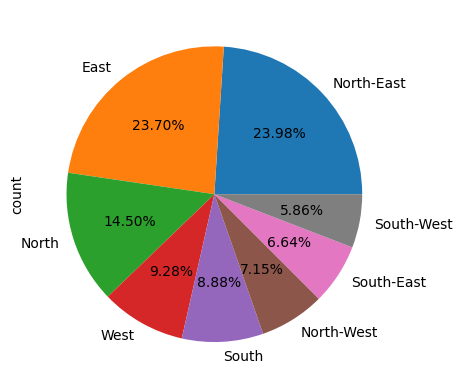

In [62]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [63]:
# i didnt find any relevancy in keeping this column, so i decided to drop it

df.drop(columns=['facing'],inplace=True)

In [64]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1452,flat,the close south,sector 50,3.10,12445.0,3,4,3+,4.0,Moderately Old,2450.0,0,1,0,0,0,1,165
2581,house,ansals palam vihar,sector 2,2.68,17213.0,4,3,2,3.0,Moderately Old,1557.0,0,0,1,0,0,1,74
1819,flat,central park flower valley,sector 33,1.35,10385.0,3,2,2,3.0,New Property,1444.0,0,0,0,0,0,0,87
775,flat,bestech park view sanskruti,sector 92,1.55,7568.0,3,4,3,16.0,Relatively New,1805.0,0,1,0,0,0,1,60
1503,flat,godrej summit,sector 104,1.05,5833.0,3,4,3+,7.0,Relatively New,2000.0,0,1,0,0,0,1,96


In [65]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [67]:
df[df['society'].isnull()]
# we will just drop this

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3408,flat,NaN,sector 78,0.6,3692.0,2,2,0,2.0,Under Construction,1625.0,0,0,0,0,0,0,0


In [68]:
df.drop(index=[3408],inplace=True)

In [69]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

### agePossession - this contains missing values in undefined

In [70]:
df['agePossession'].value_counts()

agePossession
Relatively New        1605
New Property           557
Moderately Old         545
Old Property           293
Undefined              291
Under Construction     263
Name: count, dtype: int64

In [71]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,umang monsoon breeze,sector 78,0.75,6053.0,2,2,1,5.0,Undefined,1239.0,0,0,0,0,0,0,0
3,house,independent,sector 2,5.00,15385.0,6,6,2,1.0,Undefined,3611.0,0,0,0,0,0,0,0
4,flat,dlf the arbour,sector 63,7.52,18999.0,4,4,3,15.0,Undefined,3956.0,0,0,0,0,0,0,61
9,flat,godrej nature plus,sector 33,1.10,7971.0,2,2,2,14.0,Undefined,1533.0,0,0,0,0,0,0,56
10,flat,m3m capital,sector 113,1.83,13969.0,2,2,0,7.0,Undefined,1310.0,0,0,0,0,0,0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3489,house,independent,sector 1,4.75,10556.0,6,7,0,4.0,Undefined,4500.0,0,0,0,0,0,0,0
3492,flat,supertech hues,sector 68,0.93,8611.0,2,2,2,11.0,Undefined,1200.0,0,0,0,0,0,0,0
3501,flat,aipl joy square,sector 63a,0.70,10101.0,1,1,0,7.0,Undefined,693.0,0,0,0,0,0,0,0
3535,house,ansal celebrity homes,sector 2,5.20,10000.0,4,5,2,1.0,Undefined,5200.0,0,0,0,0,0,0,0


In [73]:
# we will check for those rows whose agePossession is undefined
# then we will check that row's sector and property_type and then search in all dataframe about the that sector number and property_type
# and then fill undefined with the mode() ie the most frequent value for agePossession

def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [74]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [75]:
df['agePossession'].value_counts()

agePossession
Relatively New        1717
New Property           597
Moderately Old         584
Old Property           326
Under Construction     277
Undefined               53
Name: count, dtype: int64

In [76]:
# doing the same thing but considering only sector here

def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [77]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [78]:
df['agePossession'].value_counts()

agePossession
Relatively New        1726
New Property           598
Moderately Old         591
Old Property           329
Under Construction     277
Undefined               33
Name: count, dtype: int64

In [79]:
# doing the same thing but using property_type here

def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [80]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [81]:
df['agePossession'].value_counts()

agePossession
Relatively New        1728
Moderately Old         622
New Property           598
Old Property           329
Under Construction     277
Name: count, dtype: int64

In [82]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [83]:
df.to_csv('mandar_gurgaon_properties_missing_value_imputation.csv',index=False)

In [84]:
df.shape

(3554, 18)